<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/1-1.1SimulationCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Non Linear Functions

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
# Generate training data
def function1():
  x = np.linspace(-2 * np.pi, 2 * np.pi, 2000)
  y = np.sin(5 * np.pi * x) / (5 * np.pi * x)
  return x,y

def function2():
  x = np.linspace(-1 * np.pi, 1 * np.pi, 1000)
  y = 1 / (1 + np.exp(-(np.sin(5 * np.pi * x) / (5 * np.pi * x))))
  return x,y


Converting into Pytorch Tensor


In [ ]:
# Convert to PyTorch tensors
def convertToTensors(x,y):
  x_tensor = torch.from_numpy(x).float().unsqueeze(1)
  y_tensor = torch.from_numpy(y).float().unsqueeze(1)
  return x_tensor,y_tensor

Shallow Neural Network

In [ ]:

class ShallowDNN(torch.nn.Module):
    def __init__(self):
        super(ShallowDNN, self).__init__()
        self.fc1 = torch.nn.Linear(1, 100)
        self.fc2 = torch.nn.Linear(100, 1)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
modelShallow = ShallowDNN()
# Number of parameters
total_params1 = sum(p.numel() for p in modelShallow.parameters())
print("Number of parameters in shallow DNN: ", total_params1)



Number of parameters in shallow DNN:  301


In [ ]:
summary(modelShallow,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]             200
            Linear-2                    [-1, 1]             101
Total params: 301
Trainable params: 301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:

# DNN Model2
class DNN2(torch.nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc1 = torch.nn.Linear(1, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, 1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model2 = DNN2()

total_params2 = sum(p.numel() for p in model2.parameters())
print("Number of parameters in the above DNN model : ", total_params2)



Number of parameters in the above DNN model :  8513


In [ ]:
summary(model2,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]             128
              ReLU-2                   [-1, 64]               0
            Linear-3                   [-1, 64]           4,160
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 64]           4,160
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [ ]:
# DNN Model3
class DNN3(torch.nn.Module):
    def __init__(self):
        super(DNN3, self).__init__()
        self.fc1 = torch.nn.Linear(1, 32)
        self.fc2 = torch.nn.Linear(32, 32)
        self.fc3 = torch.nn.Linear(32, 32)
        self.fc4 = torch.nn.Linear(32, 32)
        self.fc5 = torch.nn.Linear(32, 32)
        self.fc6 = torch.nn.Linear(32, 32)
        self.fc7 = torch.nn.Linear(32, 64)
        self.fc8 = torch.nn.Linear(64, 16)
        self.fc9 = torch.nn.Linear(16, 1)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.fc9(x)
        return x


model3 = DNN3()
total_params3 = sum(p.numel() for p in model3.parameters())
print("Number of parameters in the above DNN model : ", total_params3)



Number of parameters in the above DNN model :  8513


In [ ]:
summary(model3,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
              ReLU-2                   [-1, 32]               0
            Linear-3                   [-1, 32]           1,056
              ReLU-4                   [-1, 32]               0
            Linear-5                   [-1, 32]           1,056
              ReLU-6                   [-1, 32]               0
            Linear-7                   [-1, 32]           1,056
              ReLU-8                   [-1, 32]               0
            Linear-9                   [-1, 32]           1,056
             ReLU-10                   [-1, 32]               0
           Linear-11                   [-1, 32]           1,056
             ReLU-12                   [-1, 32]               0
           Linear-13                   [-1, 64]           2,112
             ReLU-14                   

Loss Function, Training the model

In [ ]:
x1,y1 = function1()
x_tensor1,y_tensor1 = convertToTensors(x1,y1)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelShallow.parameters(), lr=0.001)

# Train the model
losses1 = []
for epoch in range(10000):
    # Forward pass
    y_pred1 = modelShallow(x_tensor1)
    loss = criterion(y_pred1, y_tensor1)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss for plotting
    losses1.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

0.011679290793836117
Epoch [1000/10000], Loss: 0.0117
0.01038038358092308
Epoch [2000/10000], Loss: 0.0104
0.008843207731842995
Epoch [3000/10000], Loss: 0.0088
0.0067006321623921394
Epoch [4000/10000], Loss: 0.0067
0.005387874320149422
Epoch [5000/10000], Loss: 0.0054
0.004528124816715717
Epoch [6000/10000], Loss: 0.0045
0.0038362026680260897
Epoch [7000/10000], Loss: 0.0038
0.0033153563272207975
Epoch [8000/10000], Loss: 0.0033
0.002824255498126149
Epoch [9000/10000], Loss: 0.0028
0.0025063417851924896
Epoch [10000/10000], Loss: 0.0025


Loss Function and Training the model



In [ ]:
x2,y2 = function1()
x_tensor2,y_tensor2 = convertToTensors(x2,y2)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

# Train the model
losses2 = []
for epoch in range(10000):
    # Forward pass
    y_pred2 = model2(x_tensor2)
    loss = criterion(y_pred2, y_tensor2)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss for plotting
    losses2.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

0.0006743033300153911
Epoch [1000/10000], Loss: 0.0007
0.0004184327553957701
Epoch [2000/10000], Loss: 0.0004
0.00026064523262903094
Epoch [3000/10000], Loss: 0.0003
0.0002631426614243537
Epoch [4000/10000], Loss: 0.0003
0.00015298005018848926
Epoch [5000/10000], Loss: 0.0002
0.00014412275049835443
Epoch [6000/10000], Loss: 0.0001
0.0001322680473094806
Epoch [7000/10000], Loss: 0.0001
0.00011740782065317035
Epoch [8000/10000], Loss: 0.0001
0.00011270595859969035
Epoch [9000/10000], Loss: 0.0001
9.257167403120548e-05
Epoch [10000/10000], Loss: 0.0001


In [ ]:

# model1.to('cuda')
# summary(model1,(1,))

In [ ]:
x3,y3 = function1()
x_tensor3,y_tensor3 = convertToTensors(x3,y3)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)

# Train the model
losses3 = []
for epoch in range(10000):
    # Forward pass
    y_pred3 = model3(x_tensor3)
    loss = criterion(y_pred3, y_tensor3)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss for plotting
    losses3.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

0.00037656581844203174
Epoch [1000/10000], Loss: 0.0004
0.0003315408539492637
Epoch [2000/10000], Loss: 0.0003
0.0002790477592498064
Epoch [3000/10000], Loss: 0.0003
0.0002604061446618289
Epoch [4000/10000], Loss: 0.0003
0.00022230064496397972
Epoch [5000/10000], Loss: 0.0002
0.00019397238793317229
Epoch [6000/10000], Loss: 0.0002
0.0001805125648388639
Epoch [7000/10000], Loss: 0.0002
0.00016427249647676945
Epoch [8000/10000], Loss: 0.0002
0.0001545856794109568
Epoch [9000/10000], Loss: 0.0002
0.0001556449569761753
Epoch [10000/10000], Loss: 0.0002


In [ ]:

# model.to('cuda')
# summary(model,(1,))

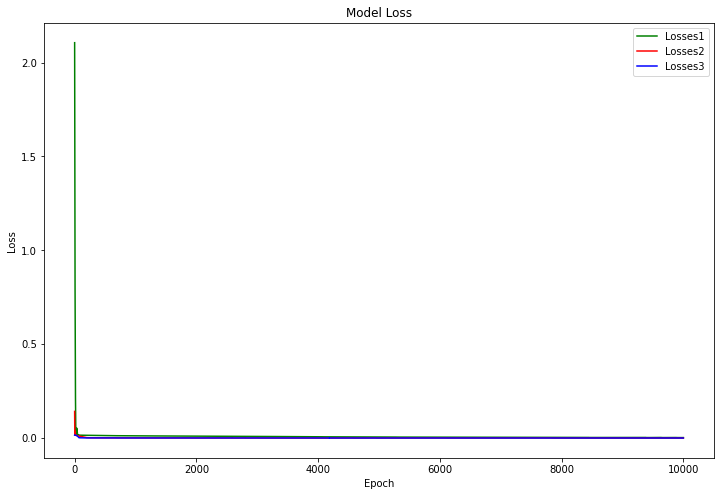

In [ ]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss')
ax.plot(losses1, 'g', label='Losses1')
ax.plot(losses2, 'r', label='Losses2')
ax.plot(losses3, 'b', label='Losses3')
ax.legend()

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

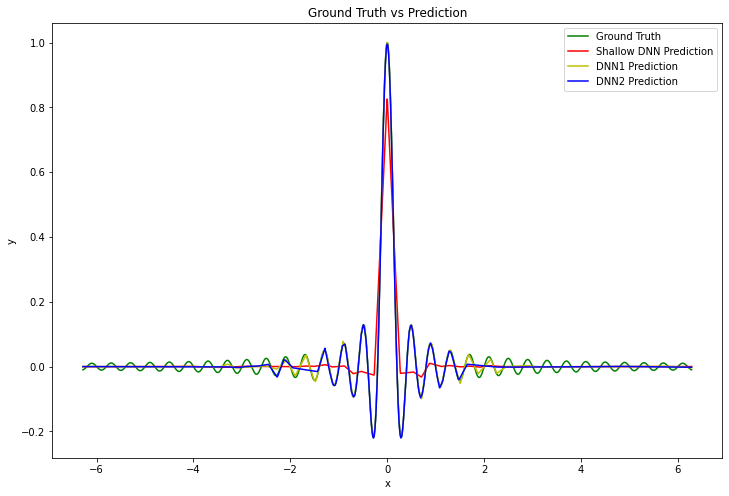

In [ ]:
# Make predictions on the training data
# model1.to('cpu')
y_pred1 = modelShallow(x_tensor1).detach().numpy()
y_pred2 = model2(x_tensor2).detach().numpy()
y_pred3 = model3(x_tensor3).detach().numpy()
# Plot the training data and predictions
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x1, y1, 'g', label='Ground Truth')
ax.plot(x1, y_pred1, 'r', label='Shallow DNN Prediction')
ax.plot(x1, y_pred2, 'y', label='DNN1 Prediction')
ax.plot(x1, y_pred3, 'b', label='DNN2 Prediction')
ax.legend()
ax.set_title('Ground Truth vs Prediction')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


For Function 2


In [ ]:
x1,y1 = function2()
x_tensor1,y_tensor1 = convertToTensors(x1,y1)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelShallow.parameters(), lr=0.001)

# Train the model
losses1 = []
for epoch in range(10000):
    # Forward pass
    y_pred1 = modelShallow(x_tensor1)
    loss = criterion(y_pred1, y_tensor1)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss for plotting
    losses1.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

0.00018330459715798497
Epoch [1000/10000], Loss: 0.0002
0.0001281709410250187
Epoch [2000/10000], Loss: 0.0001
0.00010599918459774926
Epoch [3000/10000], Loss: 0.0001
9.003750892588869e-05
Epoch [4000/10000], Loss: 0.0001
7.514525350416079e-05
Epoch [5000/10000], Loss: 0.0001
8.502410491928458e-05
Epoch [6000/10000], Loss: 0.0001
8.517911919625476e-05
Epoch [7000/10000], Loss: 0.0001
6.032085730112158e-05
Epoch [8000/10000], Loss: 0.0001
5.448723095469177e-05
Epoch [9000/10000], Loss: 0.0001
7.101179653545842e-05
Epoch [10000/10000], Loss: 0.0001


In [ ]:
x2,y2 = function2()
x_tensor2,y_tensor2 = convertToTensors(x2,y2)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

# Train the model
losses2 = []
for epoch in range(10000):
    # Forward pass
    y_pred2 = model2(x_tensor2)
    loss = criterion(y_pred2, y_tensor2)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss for plotting
    losses2.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

2.3423168386216275e-05
Epoch [1000/10000], Loss: 0.0000
6.384161679306999e-06
Epoch [2000/10000], Loss: 0.0000
5.615469035546994e-06
Epoch [3000/10000], Loss: 0.0000
5.209017217566725e-06
Epoch [4000/10000], Loss: 0.0000
4.671468104788801e-06
Epoch [5000/10000], Loss: 0.0000
4.3904119593207724e-06
Epoch [6000/10000], Loss: 0.0000
4.177952632744564e-06
Epoch [7000/10000], Loss: 0.0000
3.918039965356002e-06
Epoch [8000/10000], Loss: 0.0000
3.6586072837963e-06
Epoch [9000/10000], Loss: 0.0000
3.7227794109639945e-06
Epoch [10000/10000], Loss: 0.0000


In [ ]:
x3,y3 = function2()
x_tensor3,y_tensor3 = convertToTensors(x3,y3)

# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)

# Train the model
losses3 = []
for epoch in range(10000):
    # Forward pass
    y_pred3 = model3(x_tensor3)
    loss = criterion(y_pred3, y_tensor3)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save the loss for plotting
    losses3.append(loss.item())
    
    # Print progress
    if (epoch + 1) % 1000 == 0:
        print(loss.item())
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, 10000, loss.item()))

1.865447666205e-05
Epoch [1000/10000], Loss: 0.0000
1.4167630070005544e-05
Epoch [2000/10000], Loss: 0.0000
1.514330961072119e-05
Epoch [3000/10000], Loss: 0.0000
1.1956864000239875e-05
Epoch [4000/10000], Loss: 0.0000
6.729493179591373e-05
Epoch [5000/10000], Loss: 0.0001
5.868126663699513e-06
Epoch [6000/10000], Loss: 0.0000
5.897718892811099e-06
Epoch [7000/10000], Loss: 0.0000
2.3436736228177324e-05
Epoch [8000/10000], Loss: 0.0000
3.0004912332515232e-06
Epoch [9000/10000], Loss: 0.0000
1.552106550661847e-05
Epoch [10000/10000], Loss: 0.0000


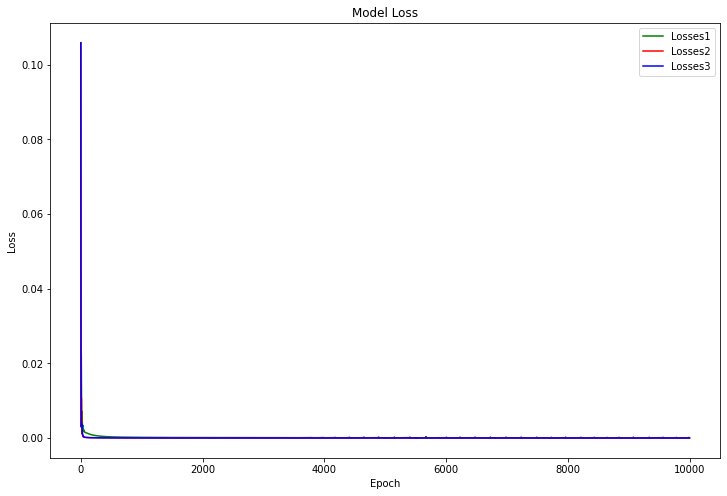

In [ ]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss')
ax.plot(losses1, 'g', label='Losses1')
ax.plot(losses2, 'r', label='Losses2')
ax.plot(losses3, 'b', label='Losses3')
ax.legend()

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

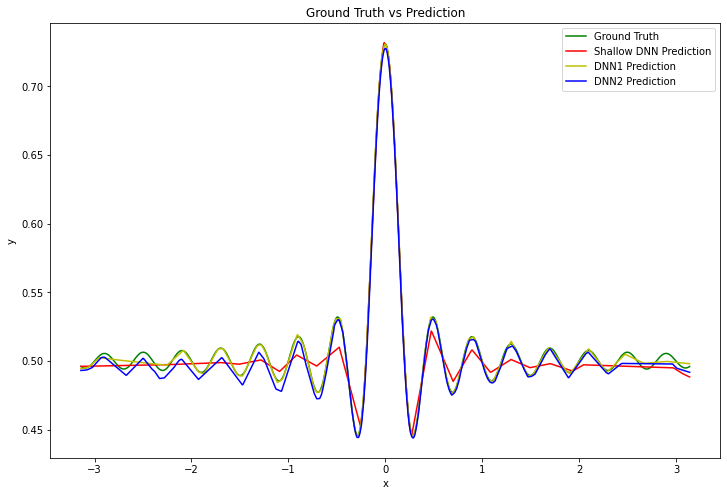

In [ ]:
# Make predictions on the training data
# model1.to('cpu')
y_pred1 = modelShallow(x_tensor1).detach().numpy()
y_pred2 = model2(x_tensor2).detach().numpy()
y_pred3 = model3(x_tensor3).detach().numpy()
# Plot the training data and predictions
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x1, y1, 'g', label='Ground Truth')
ax.plot(x1, y_pred1, 'r', label='Shallow DNN Prediction')
ax.plot(x1, y_pred2, 'y', label='DNN1 Prediction')
ax.plot(x1, y_pred3, 'b', label='DNN2 Prediction')
ax.legend()
ax.set_title('Ground Truth vs Prediction')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
